In [1]:
#Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

#Reading in our data and checking the first 10 rows
medical_data=pd.read_csv('KaggleV2-May-2016.csv',header=0,parse_dates=['ScheduledDay','AppointmentDay'],na_values='',names=['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism','Disabled','SMS Received','No-show' ])
print(medical_data.head(10))


      PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   
5  9.598513e+13        5626772      F 2016-04-27 08:36:51     2016-04-29   76   
6  7.336882e+14        5630279      F 2016-04-27 15:05:12     2016-04-29   23   
7  3.449833e+12        5630575      F 2016-04-27 15:39:58     2016-04-29   39   
8  5.639473e+13        5638447      F 2016-04-29 08:02:16     2016-04-29   21   
9  7.812456e+13        5629123      F 2016-04-27 12:48:25     2016-04-29   19   

       Neighbourhood  Scholarship  Hypertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0  

**Is there any trend in medical appointment no-shows for men vs. women?**

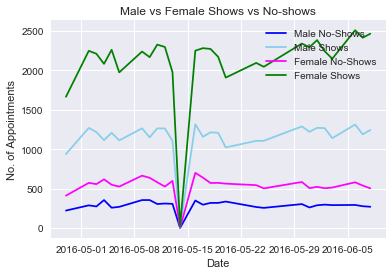

In [2]:
# Create a Crosstab For Male vs Female No-shows
noshow = medical_data.loc[medical_data['No-show'] == 'Yes']

show = medical_data.loc[medical_data['No-show'] == 'No']

male_ns = noshow.loc[noshow['Gender'] == 'M']
male_s = show.loc[show['Gender'] == 'M']

female_ns = noshow.loc[noshow['Gender'] == 'F']
female_s = show.loc[show['Gender'] == 'F']



female_noshow = pd.crosstab(index=female_ns['AppointmentDay'],  # Make a crosstab
                              columns=female_ns['No-show'])      # Name the count column

female_show = pd.crosstab(index=female_s['AppointmentDay'],  # Make a crosstab
                              columns=female_s['No-show'])      # Name the count column

male_noshow = pd.crosstab(index=male_ns['AppointmentDay'],  # Make a crosstab
                              columns=male_ns['No-show'])      # Name the count column

male_show = pd.crosstab(index=male_s['AppointmentDay'],  # Make a crosstab
                              columns=male_s['No-show'])      # Name the count column

#Plotting the previous crosstabs. We add xlabels and ylabels as well as a legend and title
plt.plot(male_noshow,label = "Male No-Shows", color = 'blue')
plt.plot(male_show,label = "Male Shows", color = 'skyblue')
plt.plot(female_noshow,label = "Female No-Shows", color = 'magenta')
plt.plot(female_show,label = "Female Shows", color = 'green')
plt.xlabel('Date')
plt.ylabel('No. of Appointments')
plt.legend(loc='upper right')
plt.title('Male vs Female Shows vs No-shows')
plt.savefig('Male_vs_Female_Shows_vs_No-shows.png')
plt.show()



*While both men and women are more likely to show for medical appointments than not, it appears women are much more likely to make medical appointments in general. *

**How does the number of appointments differ in each neighbourhood?**

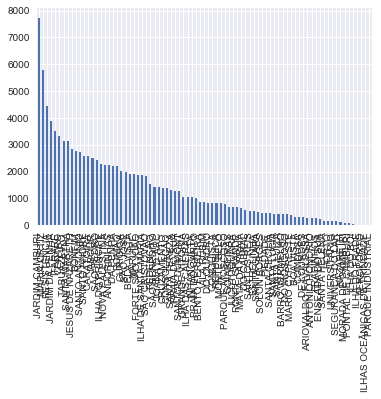

In [3]:
#plotting appointment count by neighbourhood
medical_data['Neighbourhood'].value_counts().plot(kind='bar')
plt.savefig('Neighbourhood_Appt_Frequency.png')
plt.show()

*In order to get a better view at top neighborhoods for medical appointments, let's remove any neighbourhoods with 2000 or less appointments in the timeframe.*

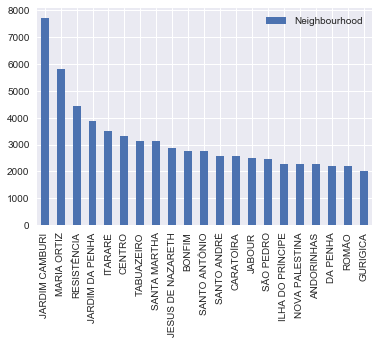

In [4]:
#replotting the appt count by neighborhood graph to only include neighbourhoods with >2000 appts
x=pd.DataFrame(medical_data['Neighbourhood'].value_counts())
y=x['Neighbourhood']>2000
#z=x[y]
x[y].plot(kind='bar')
plt.savefig('Top_Neighbourhoods_by_Appt_Frequency.png')
plt.show()



*While the majority of the top neighbourhoods by number of appointments hover around 2-3k appointments, there are several neighbourhoods that seem to have abnormally high appointments in the timeframe. Jardim Camburi has more than double the number of appointments than the majority of other neighbourhoods.*

**Given the fact that Jardim Camburi is the neighbourhood with the most medical appointments, what is the show vs. no-show trend? Is the trend within the neighbourhood any different than the average trend?**

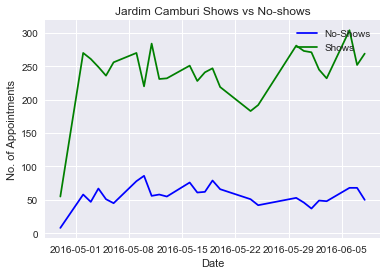

In [5]:
# Inspect the no show rate for the neighborhood with the most appointments: JARDIM CAMBURI
jardim = medical_data.loc[medical_data['Neighbourhood'] == 'JARDIM CAMBURI']

show = jardim.loc[jardim['No-show'] == 'No']
no_show = jardim.loc[jardim['No-show'] == 'Yes']



jardim_noshow = pd.crosstab(index=no_show['AppointmentDay'],  # Make a crosstab
                              columns=no_show['No-show'])      # Name the count column

jardim_show = pd.crosstab(index=show['AppointmentDay'],  # Make a crosstab
                              columns=show['No-show'])      # Name the count column


#Plotting the previous crosstabs. We add xlabels and ylabels as well as a legend and title
plt.plot(jardim_noshow,label = "No-Shows", color = 'blue')
plt.plot(jardim_show,label = "Shows", color = 'green')
plt.xlabel('Date')
plt.ylabel('No. of Appointments')
plt.legend(loc='upper right')
plt.title('Jardim Camburi Shows vs No-shows')
plt.savefig('Jardim_Camburi.png')
plt.show()

*Medical appointments in Jardim Camburi  drop off towards the 3rd week of May, and then spike toward the beginning of June.*

**Is there any trend in medical appointments by medical condition?**

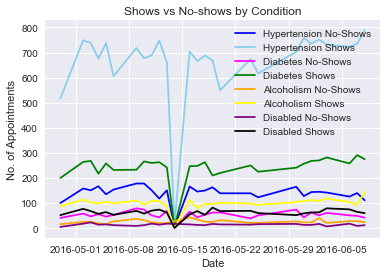

In [6]:
# Create a plot For Shows vs NoShows by Condition

noshow = medical_data.loc[medical_data['No-show'] == 'Yes']
show = medical_data.loc[medical_data['No-show'] == 'No']

hypertension_ns = noshow.loc[noshow['Hypertension'] == 1]
hypertension_s = show.loc[show['Hypertension'] == 1]
diabetes_ns = noshow.loc[noshow['Diabetes'] == 1]
diabetes_s = show.loc[show['Diabetes'] == 1]
alcoholism_ns = noshow.loc[noshow['Alcoholism'] == 1]
alcoholism_s = show.loc[show['Alcoholism'] == 1]
disabled_ns = noshow.loc[noshow['Disabled'] == 1]
disabled_s = show.loc[show['Disabled'] == 1]


hypertension_ns_ct = pd.crosstab(index=hypertension_ns['AppointmentDay'],  # Make a crosstab
                              columns=hypertension_ns['No-show'])      # Name the count column
hypertension_s_ct = pd.crosstab(index=hypertension_s['AppointmentDay'],  # Make a crosstab
                              columns=hypertension_s['No-show'])      # Name the count column
diabetes_ns_ct = pd.crosstab(index=diabetes_ns['AppointmentDay'],  # Make a crosstab
                              columns=diabetes_ns['No-show'])      # Name the count column
diabetes_s_ct = pd.crosstab(index=diabetes_s['AppointmentDay'],  # Make a crosstab
                              columns=diabetes_s['No-show'])      # Name the count column
alcoholism_ns_ct = pd.crosstab(index=alcoholism_ns['AppointmentDay'],  # Make a crosstab
                              columns=alcoholism_ns['No-show'])      # Name the count column
alcoholism_s_ct = pd.crosstab(index=alcoholism_s['AppointmentDay'],  # Make a crosstab
                              columns=alcoholism_s['No-show'])      # Name the count column
disabled_ns_ct = pd.crosstab(index=disabled_ns['AppointmentDay'],  # Make a crosstab
                              columns=disabled_ns['No-show'])      # Name the count column
disabled_s_ct = pd.crosstab(index=disabled_s['AppointmentDay'],  # Make a crosstab
                              columns=disabled_s['No-show'])      # Name the count column

#Plotting the previous crosstabs. We add xlabels and ylabels as well as a legend and title
plt.plot(hypertension_ns_ct,label = "Hypertension No-Shows", color = 'blue')
plt.plot(hypertension_s_ct,label = "Hypertension Shows", color = 'skyblue')
plt.plot(diabetes_ns_ct,label = "Diabetes No-Shows", color = 'magenta')
plt.plot(diabetes_s_ct,label = "Diabetes Shows", color = 'green')
plt.plot(alcoholism_ns_ct,label = "Alcoholism No-Shows", color = 'orange')
plt.plot(alcoholism_s_ct,label = "Alcoholism Shows", color = 'yellow')
plt.plot(disabled_ns_ct,label = "Disabled No-Shows", color = 'purple')
plt.plot(disabled_s_ct,label = "Disabled Shows", color = 'black')
plt.xlabel('Date')
plt.ylabel('No. of Appointments')
plt.legend(loc='upper right')
plt.title('Shows vs No-shows by Condition')
plt.savefig('Shows_vs_No-shows_by_Condition.png')
plt.show()



*The highest appointment frequency by medical condition is hypertension, followed by diabetes. The rate of hypertension in this area seems to be very high. Individuals with alcoholism and/or are disabled are much less likely to schedule medical appointments.*

**In the following charts I broke out each medical condition appointment frequency.**

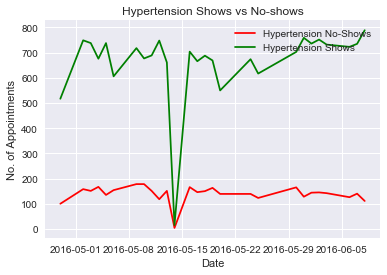

In [8]:
#hypertension shows vs noshows
plt.plot(hypertension_ns_ct,label = "Hypertension No-Shows", color = 'red')
plt.plot(hypertension_s_ct,label = "Hypertension Shows", color = 'green')
plt.xlabel('Date')
plt.ylabel('No. of Appointments')
plt.legend(loc='upper right')
plt.title('Hypertension Shows vs No-shows')
plt.savefig('Hypertension Shows vs No-shows.png')
plt.show()


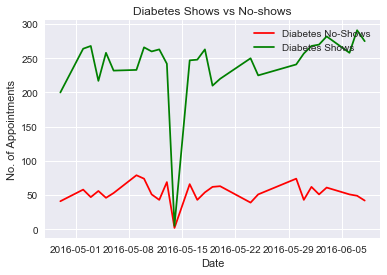

In [9]:
#diabetes shows vs noshows
plt.plot(diabetes_ns_ct,label = "Diabetes No-Shows", color = 'red')
plt.plot(diabetes_s_ct,label = "Diabetes Shows", color = 'green')
plt.xlabel('Date')
plt.ylabel('No. of Appointments')
plt.legend(loc='upper right')
plt.title('Diabetes Shows vs No-shows')
plt.savefig('Diabetes Shows vs No-shows.png')
plt.show()


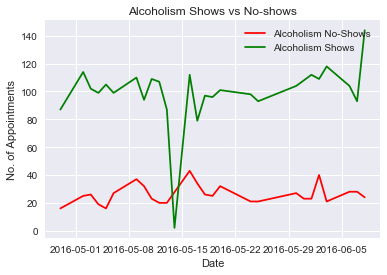

In [10]:
#alcoholism shows vs noshows
plt.plot(alcoholism_ns_ct,label = "Alcoholism No-Shows", color = 'red')
plt.plot(alcoholism_s_ct,label = "Alcoholism Shows", color = 'green')
plt.xlabel('Date')
plt.ylabel('No. of Appointments')
plt.legend(loc='upper right')
plt.title('Alcoholism Shows vs No-shows')
plt.savefig('Alcoholism Shows vs No-shows.png')
plt.show()

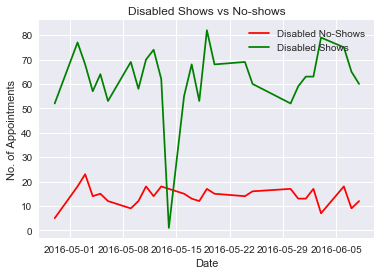

In [11]:
#disabled shows vs noshows
plt.plot(disabled_ns_ct,label = "Disabled No-Shows", color = 'red')
plt.plot(disabled_s_ct,label = "Disabled Shows", color = 'green')
plt.xlabel('Date')
plt.ylabel('No. of Appointments')
plt.legend(loc='upper right')
plt.title('Disabled Shows vs No-shows')
plt.savefig('Disabled Shows vs No-shows.png')
plt.show()

**Is there any trend in the hours at which appointments are booked throughout the day?**

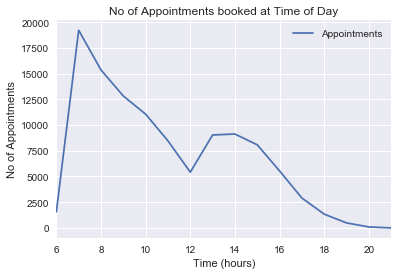

In [12]:
# Creating a graph that shows us the number of appointments booked each hour
# Creating a variable to store the date time
schedule_value=medical_data.loc[:,'ScheduledDay'].values
schedule_df=pd.DataFrame(schedule_value)
schedule_df.columns=['Date']
schedule_df['Appointments']=1

# Creating graph that sums the number of rows in each hour block of the day and returns the result
schedule_df=pd.DataFrame(schedule_df,columns=['Date','Appointments']).set_index('Date')


ax=schedule_df.groupby(schedule_df.index.hour).sum().plot()
ax.set_xlabel('Time (hours)')
ax.set_ylabel('No of Appointments')
ax.set_title('No of Appointments booked at Time of Day')
plt.savefig("Appointments vs Time.png")

*As one would expect, the highest frequency of appointment bookings are in the early morning hours, immediately following the start of medical office hours. There is also a slight spike following lunch hours.*